Problem Statement:


Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
# Importing Necessery liabraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)


In [3]:
# Importing dataset

df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\My Data\Datasets\HR_Analytics\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [20]:
# Checking the dataset
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

Here we have 1470 rows and 35 diffrent columns in our datset.

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

We can see Attrition is our Target column in this datadset which has yes and no values we have to predict if the emplyee will leave the company or not,  hence it is a classification problem.

In [7]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* Age  - This columns is of integer datatype and represents age of the employee

* Attrition - It is out target or label column and represents wheater employee will leave company or not

* BusinessTravel  - This column is of object datatype and represents the travel frequency of employee due to business.

* DailyRate - This column is of Integer datatype and represents daily rate or waages per day of an employee

* Department - This column is of Object datatype and represents in which department the employee is working.

* DistanceFromHome - This column is of Integer datatype and represents the distance employee has to travel to reach office

* Education - This columns is also of Integer datatype and represents the education of employee

* EducationField - This column is of object datatype and shows the field in which employee is educated

* EmployeeCount - This is an integer type of column which representing the count of employee we might drop this column further.

* EmployeeNumber - This column is also of integer datatype and represdents unique code for the employee

* EnvironmentSatisfaction - 

* Gender - This column is of object datatype and tells us about gender of an employee

* HourlyRate - This column is of Integer datatype and represents how much employee is paid for an hour  in USD

* JobInvolvement - This column is of Integer datatype and represents the index for how much job envolvement the employee is having

* JobLevel - This column is of Integer datatype and represents at which level employee is working

* JobRole - This is a object type of column and represents role of employee

* JobSatisfaction - This is an integer type of column and contains the index which represents the how much job satisfaction employee is having.

* MaritalStatus - This column is of Object datatype and tells us if employee is married or not

* MonthlyIncome - This is an integer type of column and contains the monthly salary of employee in USD

* NumCompaniesWorked - This is also a integer type of column representing the number of companies an employee has worked in

* Over18 - This is column representing wheather the age of emplyee is over 18 or not

* OverTime - This is object type of column representing if emplyee is working overtime or not

* PercentSalaryHike - This is integer type of column showing the increment of an employee in %

* PerformanceRating - This is integer type of column showing how employee is rated by his boss

*  RelationshipSatisfaction - It is also an integer type of column indicating the index of relationship satisfaction of employee.

* StandardHours - This is also a integer type of column it has only one value ie 80 so we might drop this column further.

* StockOptionLevel - This again an integer type of column showing binary classification which indicates wheather employee has given stock optionor not

* TotalWorkingYears - This is an integer type of column indicates the work experince of the employee

* TrainingTimesLastYear - This is again an integer type of column showing how much times training was provided to the employee.

* WorkLifeBalance- This is an integer type of column indicating the index of work life balance of an employee

* YearsAtCompany - This is an integer type of column indicating the working years of an employee in current company.

* YearsInCurrentRole - This column indicates the number of years employee is in current job role

* YearsSinceLastPromotion - This is an integer type of column indicating number of years has passed since last promotion of an empoyee

* YearsWithCurrManager - This is an integer type of column indicating number of years has passed working with current maneger

By looking at the dataset we can see that we have from our 32 total columns we have 8 columns of object datatype, withing them 1 column is our target ( Attrition) rest 7 columns listed below need to be converted into integers before going into model building.  

* BusinessTravel

* Department                

*  EducationField

* Gender - 

* JobRole 

* MaritalStatus

* Over18

* OverTime

Also , We can drop following columns  - 

* Employee count - This column represents the single value that is count of an employee which is not going to help us in the analysis and model buinding 

* Employee number - This is a unique number gien to the employee 

* Std_hours - This is agai a column with single identical number in it .

* Over18 - This column also contains a single unique value which shows employee is over 18 years old


In [24]:
# Checking the statistics for the columns
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Here we can see that Standerd deviation is zero for employee count and Working hours hence it indicates that they have single unique value.

In [26]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Confirming no null values present in our dataset

In [28]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
# Dropping unnecessary columns
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis = 1)

In [32]:
df.shape

(1470, 31)

In [38]:
# Checking the target column

df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [91]:
# Prinig the unique values in each column
for column in df.columns:
    print(f"{column}: No of unique values {df[column].nunique()}")

Age: No of unique values 43
Attrition: No of unique values 2
BusinessTravel: No of unique values 3
DailyRate: No of unique values 886
Department: No of unique values 3
DistanceFromHome: No of unique values 29
Education: No of unique values 5
EducationField: No of unique values 6
EnvironmentSatisfaction: No of unique values 4
Gender: No of unique values 2
HourlyRate: No of unique values 71
JobInvolvement: No of unique values 4
JobLevel: No of unique values 5
JobRole: No of unique values 9
JobSatisfaction: No of unique values 4
MaritalStatus: No of unique values 3
MonthlyIncome: No of unique values 1349
MonthlyRate: No of unique values 1427
NumCompaniesWorked: No of unique values 10
OverTime: No of unique values 2
PercentSalaryHike: No of unique values 15
PerformanceRating: No of unique values 2
RelationshipSatisfaction: No of unique values 4
StockOptionLevel: No of unique values 4
TotalWorkingYears: No of unique values 40
TrainingTimesLastYear: No of unique values 7
WorkLifeBalance: No 

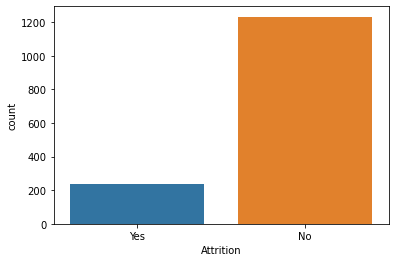

In [39]:
sns.countplot(df['Attrition'])
plt.show()

We can see that our target column has 1233 employees who have not left the job while 237 entries are the employees who have left the job.

<AxesSubplot:xlabel='Age', ylabel='Density'>

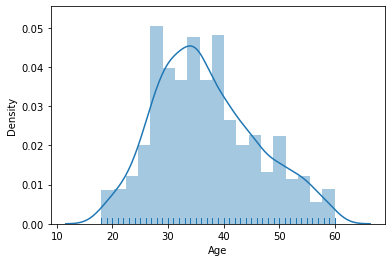

In [44]:
sns.distplot(df['Age'],rug =True)

We can see age data is normally disitrubuted and we have more peoples ageing from 25 to 45 working.

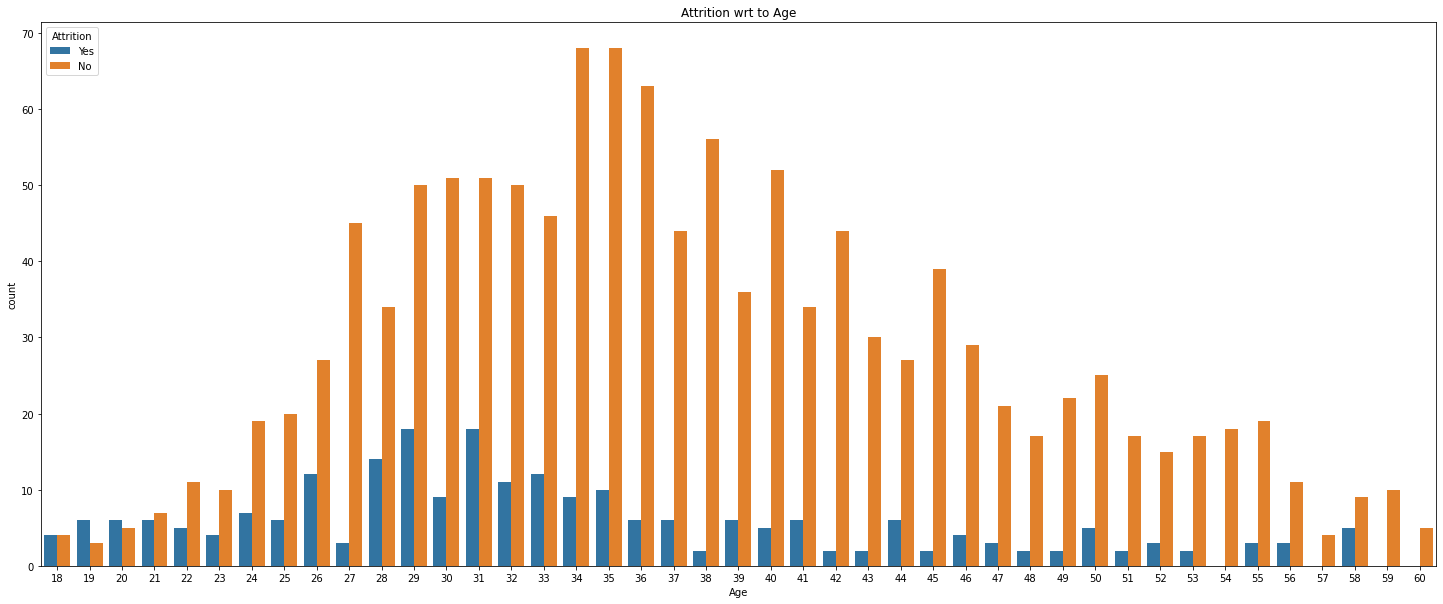

In [59]:
plt.figure(figsize = (25,10))
plt.title('Attrition wrt to Age')
sns.countplot(x = 'Age', hue = 'Attrition', data = df)
plt.show()

We can see in above graph that attrition rate is increases for employess with age 22 to mid thirties and again decreases,  people with elder age do not tend to leave the job.

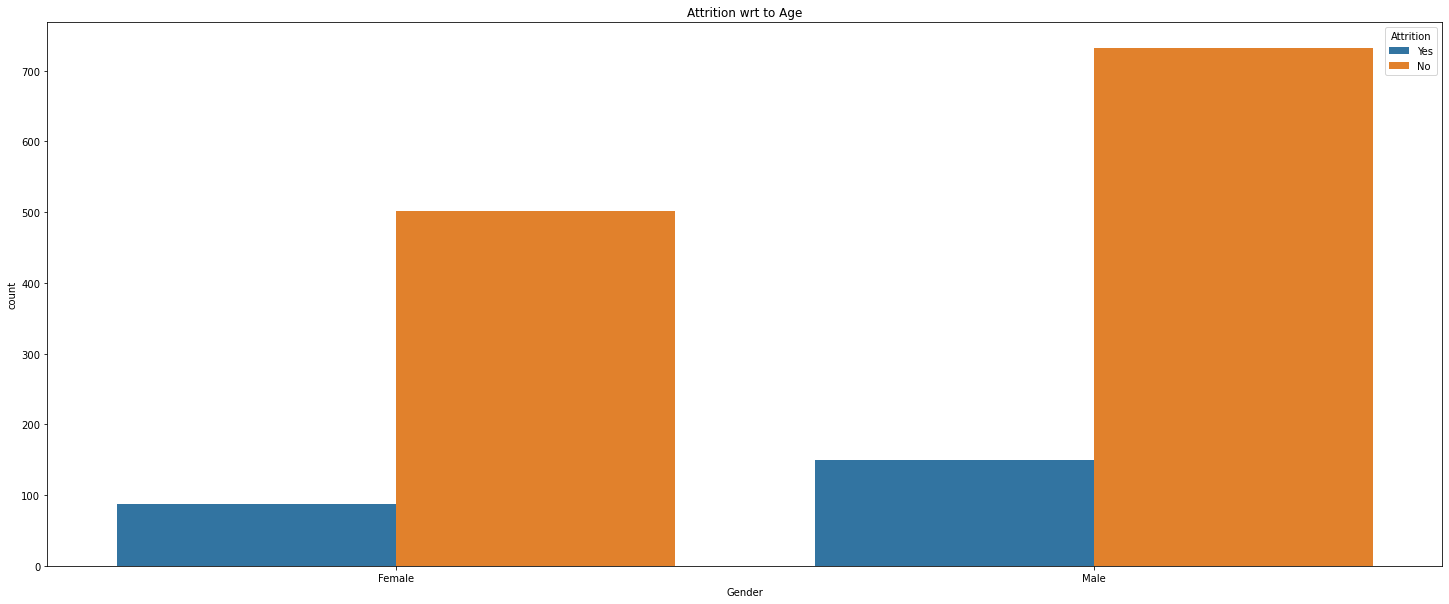

In [61]:
plt.figure(figsize = (25,10))
plt.title('Attrition wrt to Gender')
sns.countplot(x = 'Gender', hue = 'Attrition', data = df)
plt.show()

We can see here mans are more likely to leave job than women

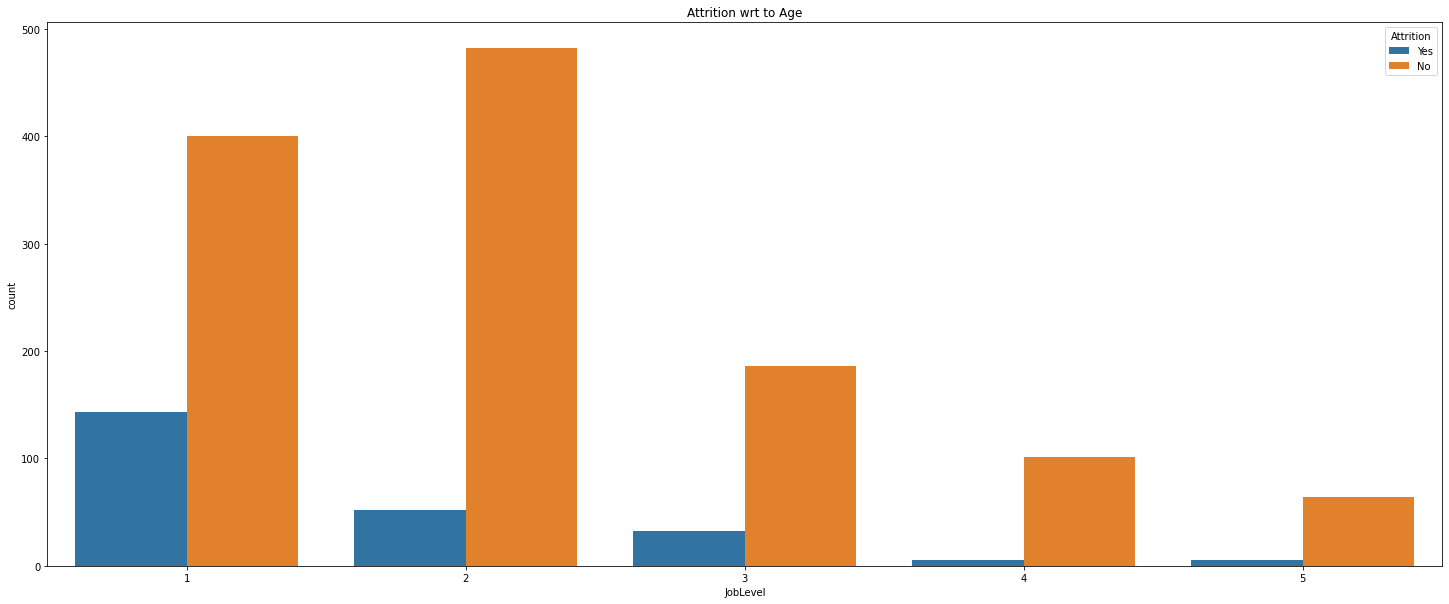

In [63]:
plt.figure(figsize = (25,10))
plt.title('Attrition wrt to JobLevel')
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)
plt.show()

It is clearly seen in above graph that attrition rate increases with higher job level. People at lower level are less likely to leave job

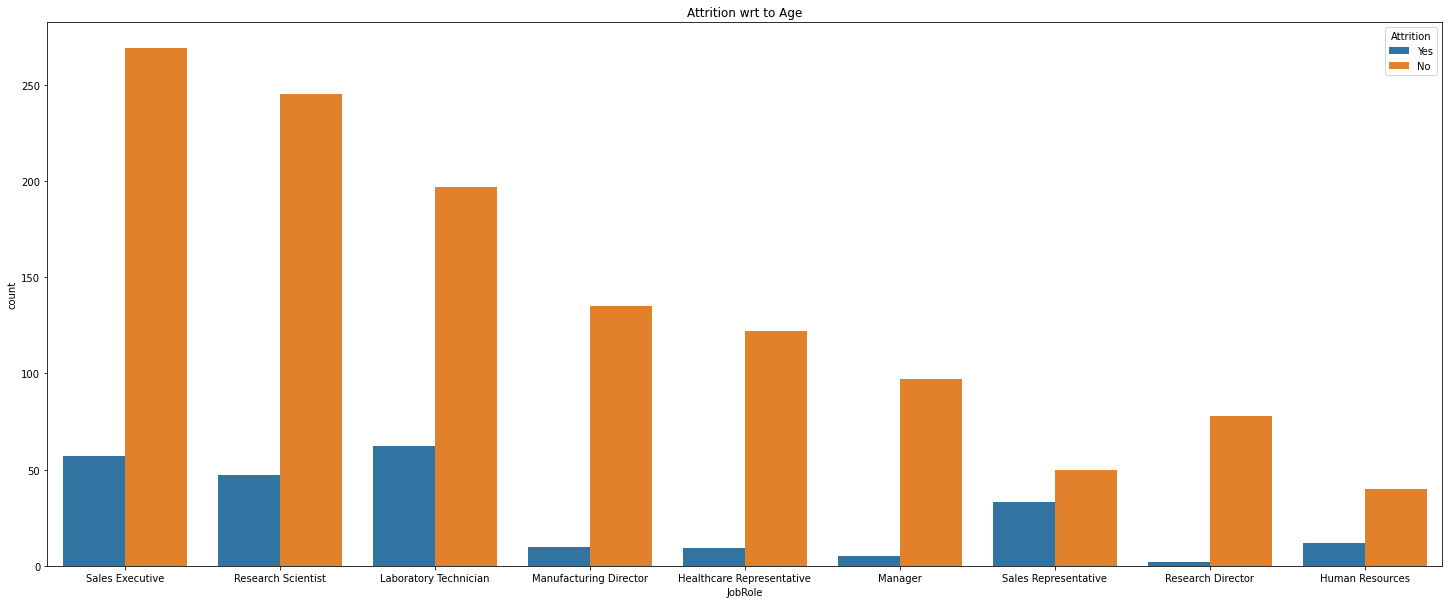

In [64]:
plt.figure(figsize = (25,10))
plt.title('Attrition wrt to JobRole')
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)
plt.show()

We can see here the attition rate is lower in job roles like Research Director , Healthcare, Manegers etc

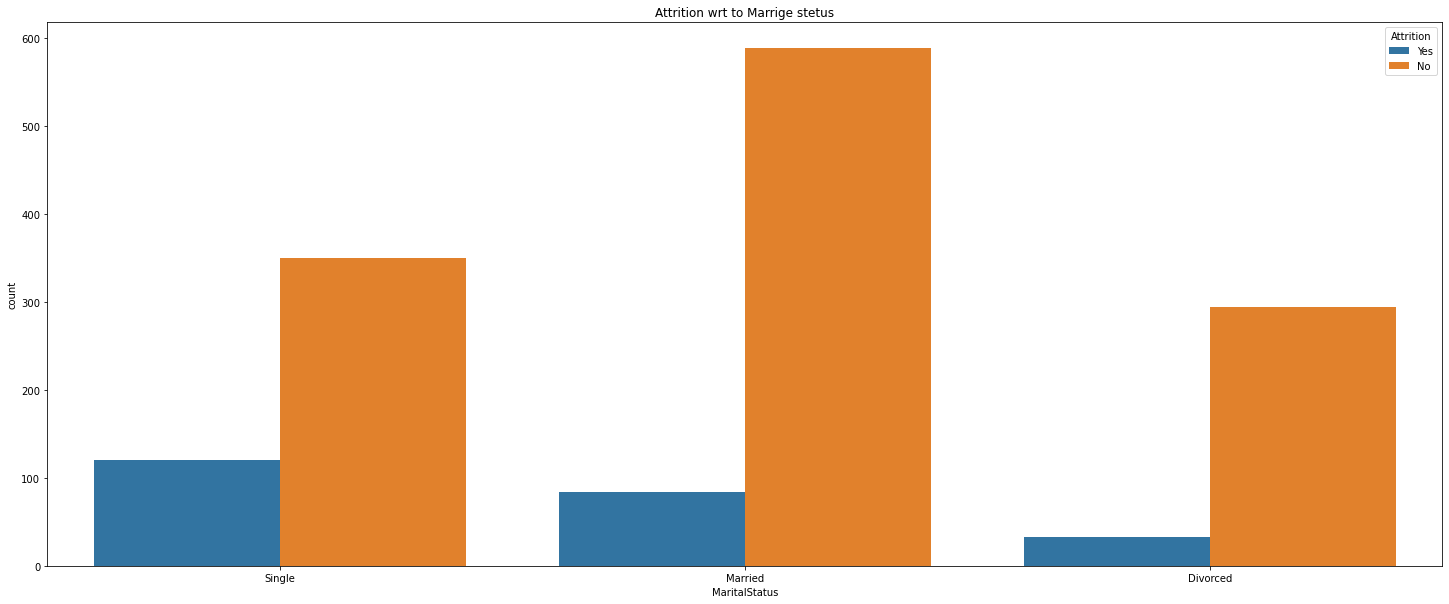

In [66]:
plt.figure(figsize = (25,10))
plt.title('Attrition wrt to Marrige stetus')
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)
plt.show()

We can see here married people are less likely to leave job being obvious the single peoples tend to switch jobs little more 

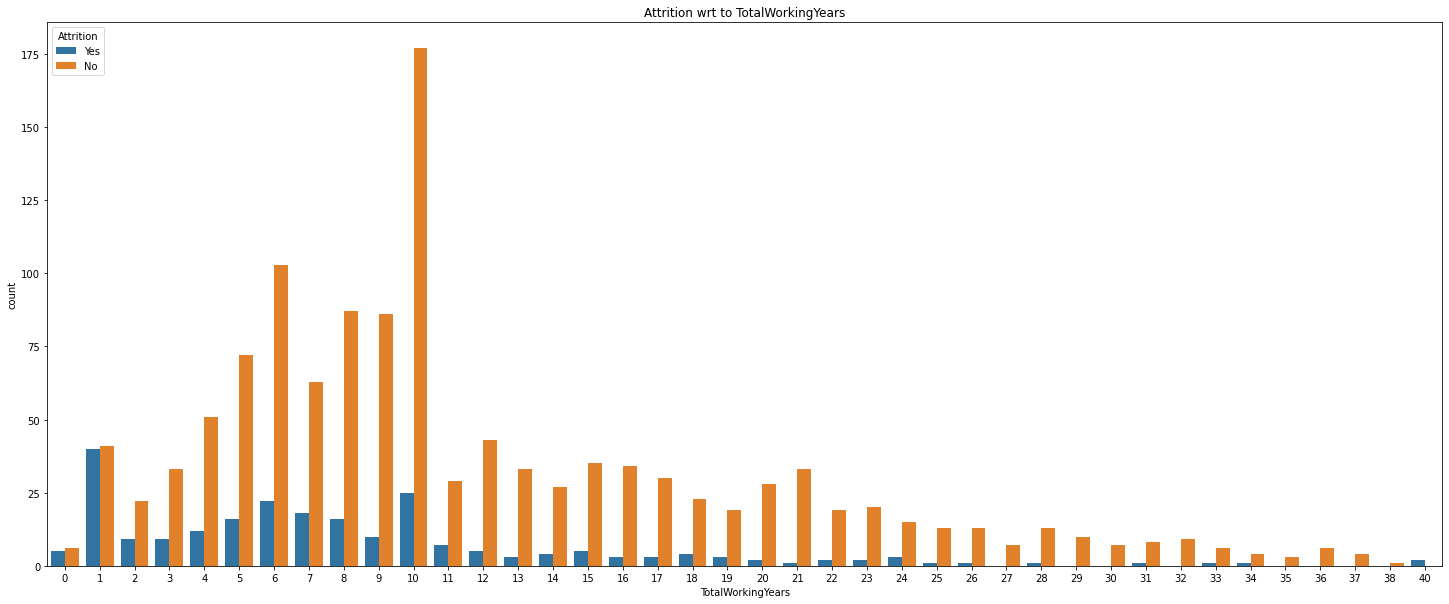

In [69]:
plt.figure(figsize = (25,10))
plt.title('Attrition wrt to TotalWorkingYears')
sns.countplot(x = 'TotalWorkingYears', hue = 'Attrition', data = df)
plt.show()

Here again we confirm that employees with 1 ro 10 years of job experience are more likely to leave the job

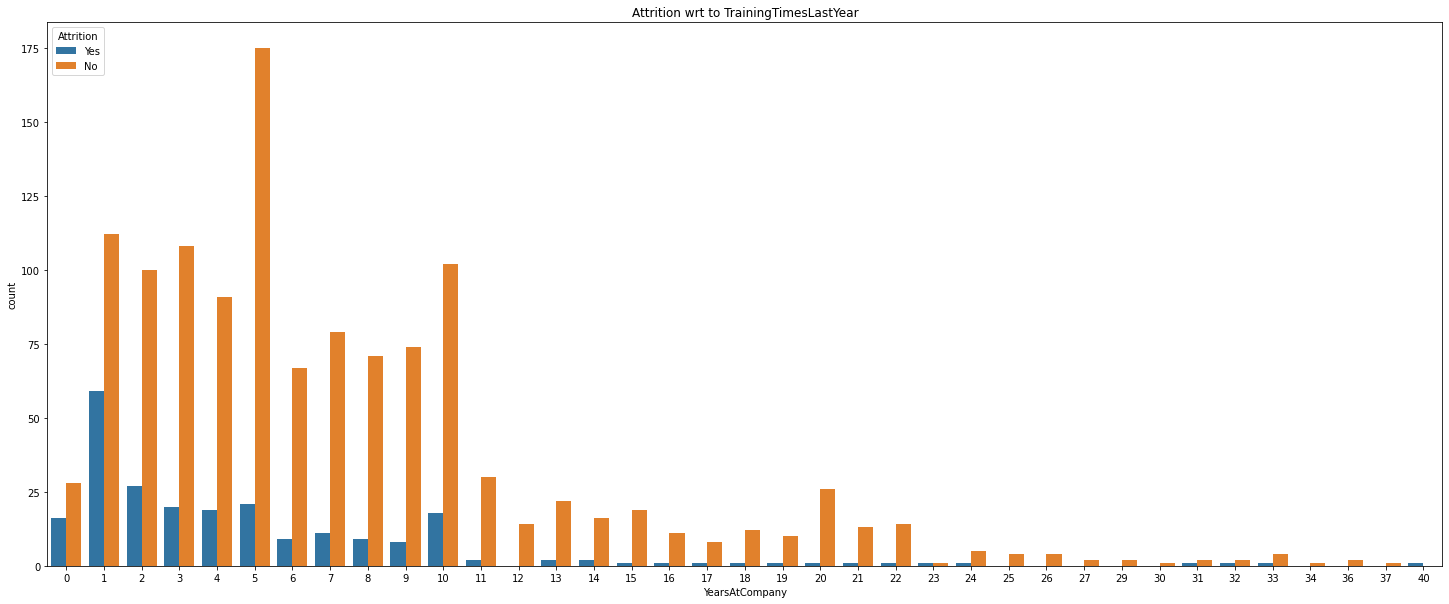

In [73]:
plt.figure(figsize = (25,10))
plt.title('Attrition wrt to YearsAtCompany')
sns.countplot(x = 'YearsAtCompany', hue = 'Attrition', data = df)
plt.show()

Here it is seen in first 5 years of joining any company the attrition rate is higher

In [81]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

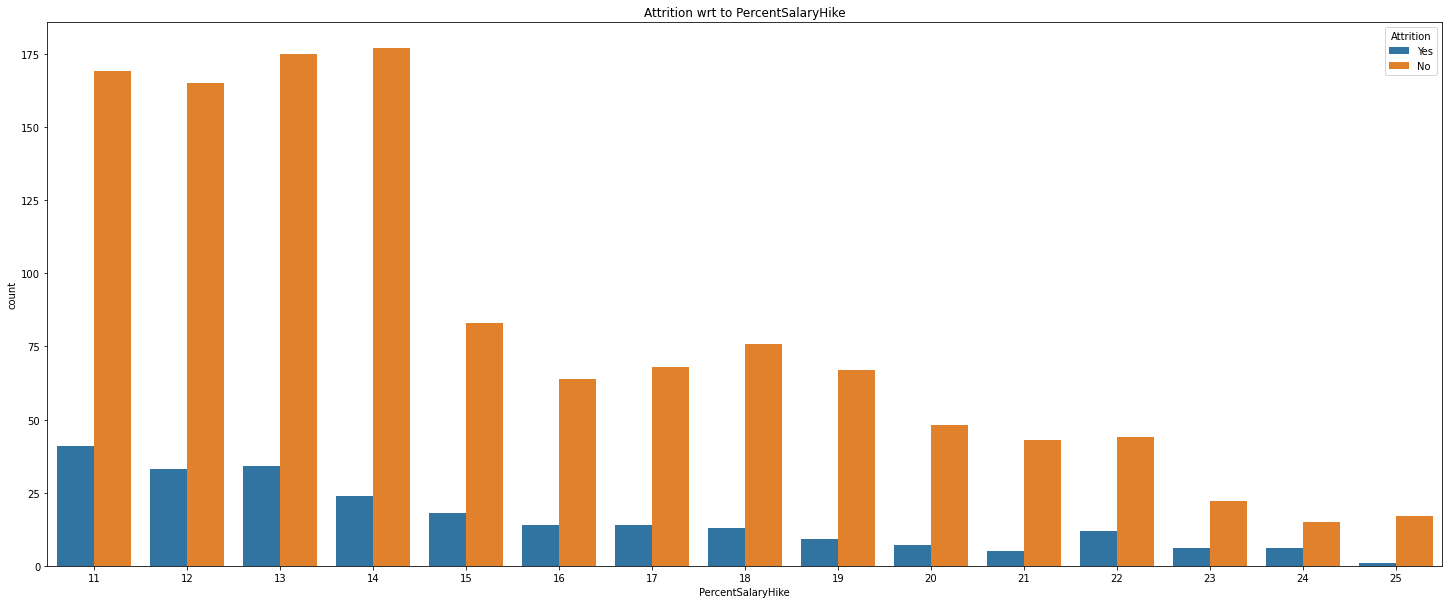

In [92]:
plt.figure(figsize = (25,10))
plt.title('Attrition wrt to PercentSalaryHike')
sns.countplot(x = 'PercentSalaryHike', hue = 'Attrition', data = df)
plt.show()

Here we can see that employees given low salary hike are more likely to leave the job

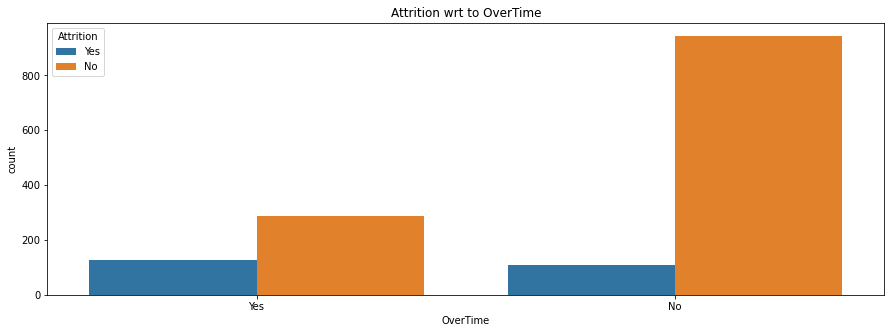

In [95]:
plt.figure(figsize = (15,5))
plt.title('Attrition wrt to OverTime')
sns.countplot(x = 'OverTime', hue = 'Attrition', data = df)
plt.show()


Here we can see that employees working overtime are more likely to leave the job

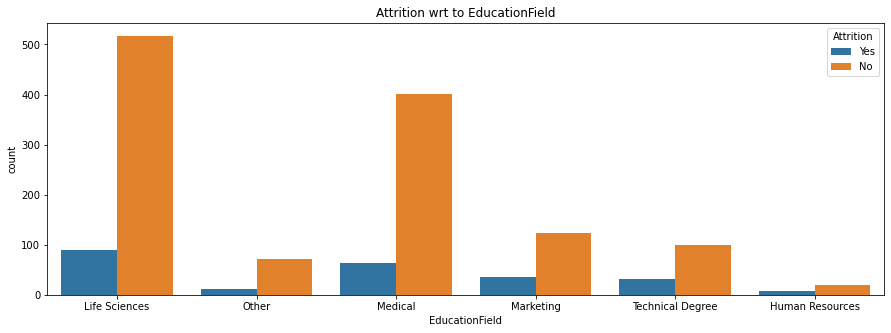

In [101]:
plt.figure(figsize = (15,5))
plt.title('Attrition wrt to EducationField')
sns.countplot(x = 'EducationField', hue = 'Attrition', data = df)
plt.show()

It is seen that departments like marketing, Tech and HR are having more Attrition rate

Before processing further we need to convert object columns into integers 

In [102]:
# Importing label encoder to encode the categirical columns into numbers

In [107]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
 

In [108]:
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])

df['Department']=le.fit_transform(df['Department'])

df['EducationField']=le.fit_transform(df['EducationField'])

df['Gender']=le.fit_transform(df['Gender'])

df['JobRole']=le.fit_transform(df['JobRole'])

df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

df['OverTime']=le.fit_transform(df['OverTime'])

In [111]:
# Encoding the target column 

df['Attrition']=le.fit_transform(df['Attrition'])

In [112]:
df.info()
# Now We can see that all columns are integers only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

In [116]:
# Checking for correlation

corr = df.corr()

<AxesSubplot:>

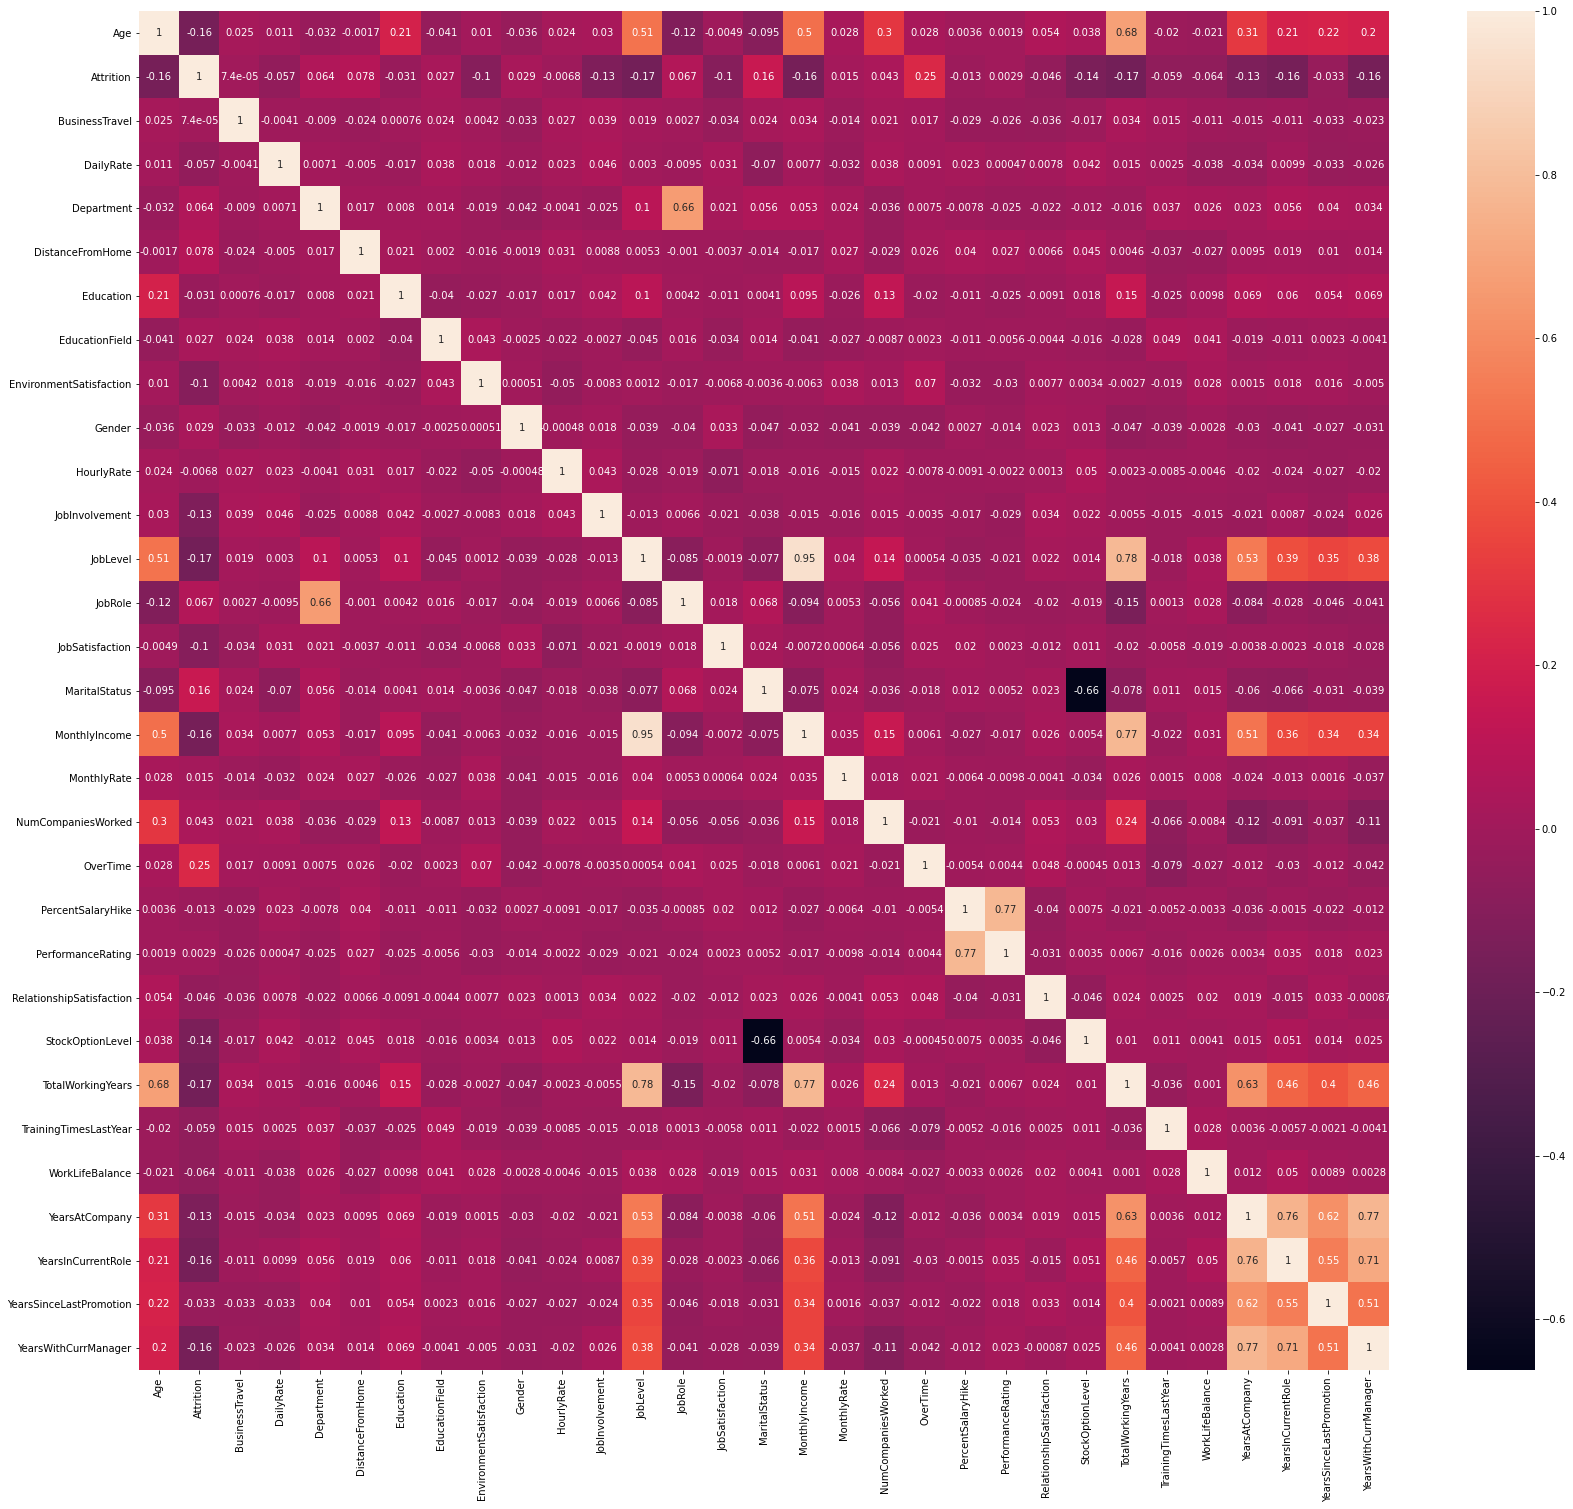

In [124]:
plt.figure(figsize = (28,25))
sns.heatmap(corr, annot = True)

* We can see with the heatmap that highest correlation ie 96 % exists between the job level and monthly Income which is obvious that monthly income increases with job level

* Second highest correlation exist ie 78 % between Total working years  and joblevel

* Also 77 % correlation exists between the Total working years and monthly income

* 71 % correlation exists between Years with current maneger and Years in current role

We dont want to lose any data so not dropping any correlated columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-p

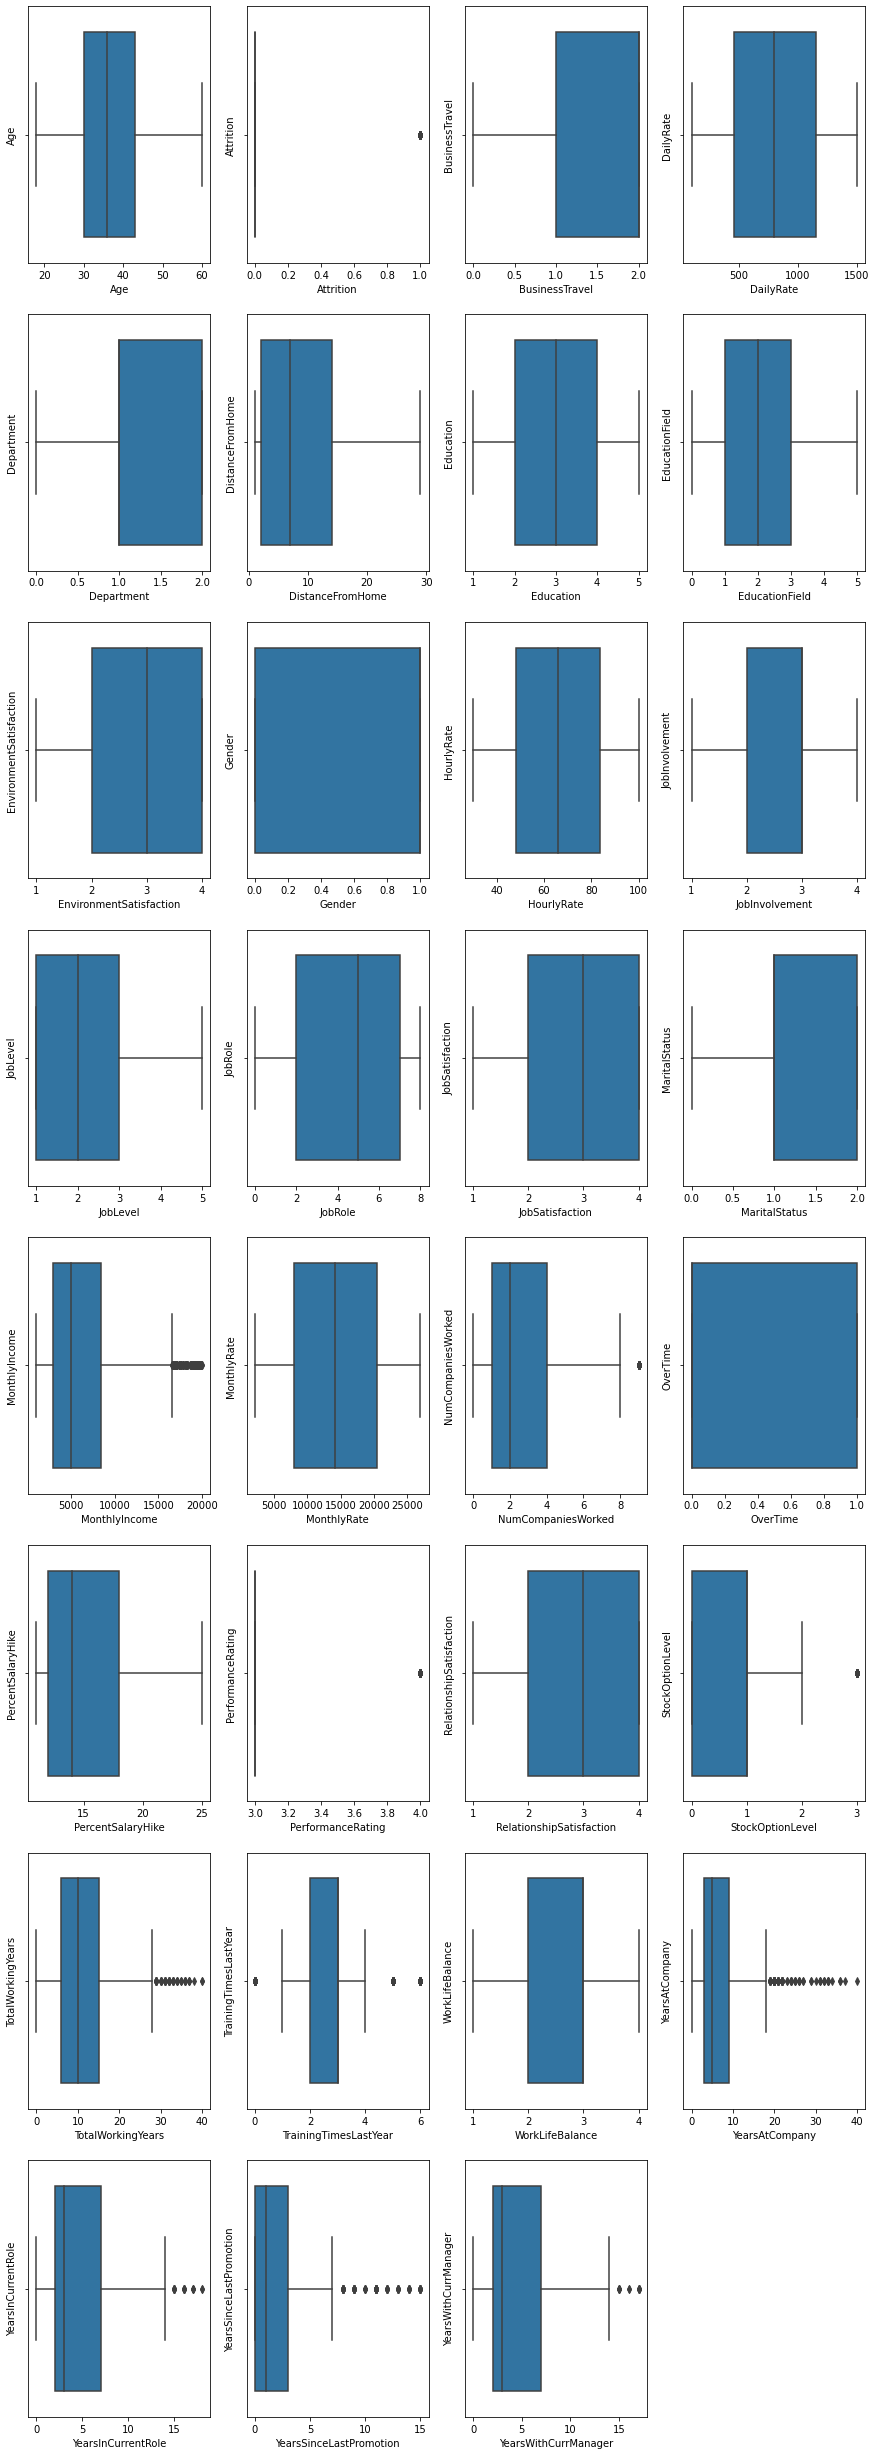

In [130]:
# Checking for Outlies

plt.figure(figsize = (15,50))
graph = 1

for column in df:
    if graph <=35:
        ax = plt.subplot(9,4,graph)
        sns.boxplot(df[column], orient ='v')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graph+=1   
plt.show()

In [131]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

We can see that our columns MonthlyIncome , TotalWorkingYears , YearsAtCompany, YearsInCurrentRole , YearsSinceLastPromotion are having outliers we need to remove them before processing

In [133]:
df.shape

(1470, 31)

In [134]:
# Using z-Squre to remove outliers

from scipy.stats import zscore

In [141]:
z_score = zscore(df[['MonthlyIncome','TotalWorkingYears','YearsAtCompany']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

df= df[filtering_entry]

In [142]:
df.shape

(1360, 31)

In [149]:
print ('Data lost = ', ((1470-1360)/1470)*100 , '%')

Data lost =  7.482993197278912 %


In [150]:
Checking for skewness
df.skew()

Age                         0.502146
Attrition                   1.781383
BusinessTravel             -1.422662
DailyRate                  -0.009791
Department                  0.179632
DistanceFromHome            0.924353
Education                  -0.289018
EducationField              0.557507
EnvironmentSatisfaction    -0.315068
Gender                     -0.399321
HourlyRate                 -0.028604
JobInvolvement             -0.499450
JobLevel                    0.891653
JobRole                    -0.409010
JobSatisfaction            -0.334293
MaritalStatus              -0.177277
MonthlyIncome               1.456844
MonthlyRate                 0.038352
NumCompaniesWorked          1.051033
OverTime                    0.952014
PercentSalaryHike           0.804991
PerformanceRating           1.914911
RelationshipSatisfaction   -0.285552
StockOptionLevel            0.967843
TotalWorkingYears           0.888643
TrainingTimesLastYear       0.587859
WorkLifeBalance            -0.559342
Y

We can see that some of our columns have skewness , we will remove it by power transformation

In [152]:
# Splitting data into label and Features

In [153]:
x = df.drop('Attrition', axis = 1)
y = df['Attrition']

In [155]:
# Removing skewness 

from sklearn.preprocessing import power_transform

In [156]:
x_new = power_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [158]:
x=pd.DataFrame(x_new, columns=x.columns)

In [159]:
x.skew()

Age                        -0.002709
BusinessTravel             -0.957817
DailyRate                  -0.197583
Department                  0.012823
DistanceFromHome           -0.016178
Education                  -0.101368
EducationField             -0.004985
EnvironmentSatisfaction    -0.202162
Gender                     -0.399321
HourlyRate                 -0.105457
JobInvolvement             -0.018597
JobLevel                    0.093144
JobRole                    -0.356570
JobSatisfaction            -0.214982
MaritalStatus              -0.163776
MonthlyIncome               0.020243
MonthlyRate                -0.177141
NumCompaniesWorked          0.018396
OverTime                    0.952014
PercentSalaryHike           0.112730
PerformanceRating           0.000000
RelationshipSatisfaction   -0.187329
StockOptionLevel            0.097574
TotalWorkingYears          -0.017548
TrainingTimesLastYear       0.056271
WorkLifeBalance            -0.012745
YearsAtCompany             -0.031836
Y

Now we see skewness removed from our dataset

Since we have classification problem at first going with usual Logistic regression model

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



In [163]:
 # checking for best random state for data split
maxAcc = 0
maxRS=0

for i in range(0,350):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    acc=accuracy_score(y_test, predf)
    
    if acc>maxAcc:
        maxAcc=acc
        macRS = i
print('Best Accuracy=',maxAcc, "Random state=",macRS)    

    

Best Accuracy= 0.9191176470588235 Random state= 293


In [164]:
# Spitting data into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=293)

In [165]:
LR.fit(x_train,y_train)

predict_=LR.predict(x_test)

print("Accuracy",accuracy_score(y_test,predict_)*100)

print(confusion_matrix(y_test,predict_))
print(classification_report(y_test,predict_))

Accuracy 91.91176470588235
[[232   8]
 [ 14  18]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       240
           1       0.69      0.56      0.62        32

    accuracy                           0.92       272
   macro avg       0.82      0.76      0.79       272
weighted avg       0.91      0.92      0.92       272



We got good accuracy but going for more advanced models for better accuracy

In [166]:
# Decision tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [167]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
pred = dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 0.8014705882352942
[[211  29]
 [ 25   7]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       240
           1       0.19      0.22      0.21        32

    accuracy                           0.80       272
   macro avg       0.54      0.55      0.55       272
weighted avg       0.81      0.80      0.81       272



In [212]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


In [213]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)

print('Accuracy',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 90.80882352941177
[[237   3]
 [ 22  10]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       240
           1       0.77      0.31      0.44        32

    accuracy                           0.91       272
   macro avg       0.84      0.65      0.70       272
weighted avg       0.90      0.91      0.89       272



In [178]:
# Support Vector Classifier

from sklearn.svm import SVC

svc=SVC()

In [179]:
svc.fit(x_train,y_train)
new_pred = svc.predict(x_test)

print('Accuracy',accuracy_score(y_test,new_pred)*100)
print(confusion_matrix(y_test,new_pred))
print(classification_report(y_test,new_pred))

Accuracy 91.54411764705883
[[237   3]
 [ 20  12]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       240
           1       0.80      0.38      0.51        32

    accuracy                           0.92       272
   macro avg       0.86      0.68      0.73       272
weighted avg       0.91      0.92      0.90       272



In [180]:
# Cross Validation

In [181]:
from sklearn.model_selection import cross_val_score

In [182]:
scr = cross_val_score(LR, x,y, cv=8)
print("Cross validation score for Logistic Regression is", scr.mean())


scr = cross_val_score(rf, x,y, cv=8)
print("Cross validation score for Random Forest is", scr.mean())


scr = cross_val_score(svc, x,y, cv=8)
print("Cross validation score for SVC is", scr.mean())




Cross validation score for Logistic Regression is 0.8669117647058824
Cross validation score for Random Forest is 0.8522058823529413
Cross validation score for SVC is 0.8632352941176471


Though it shows that logisctic regression is best performing model it does not have more parameters to tune also there is very less diffrance between support vector model and LR model so going for tunning parameters for SVC model

In [183]:
# Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV
 

In [184]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [185]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 

In [187]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [188]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [189]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.001)


In [191]:
grid_predictions = grid.predict(x_test)

In [193]:

print('Accuracy',accuracy_score(y_test,grid_predictions)*100)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

Accuracy 91.91176470588235
[[231   9]
 [ 13  19]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       240
           1       0.68      0.59      0.63        32

    accuracy                           0.92       272
   macro avg       0.81      0.78      0.79       272
weighted avg       0.92      0.92      0.92       272



In [197]:
# Plotting ROC AUC Curve

In [198]:
from sklearn.metrics import plot_roc_curve

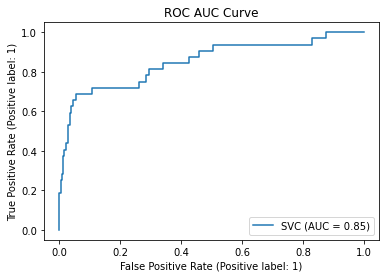

In [199]:
plot_roc_curve(grid.best_estimator_,x_test, y_test)

plt.title("ROC AUC Curve")

plt.show()

In [200]:
# Saving Model

In [201]:
import joblib


joblib.dump(grid.best_estimator_,"HR_Analytics")

['HR_Analytics']